In [2]:
!pip install mlrose

In [1]:
!pip install mlrose-hiive

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-cp37-none-any.whl size=98351 sha256=9eed1c018eb0355fbd3aef0c60c6841faea2405313992c9689c0807cb6e71026
  Stored in directory: /root/.cache/pip/wheels/7c/42/31/77944bb5cb941be07e4a96e0c112ae32c8d27017c5f31459de
Successfully built mlrose-hiive


In [4]:
import time
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import math
np.random.seed(44)

In [43]:
# define alternative N-Queens fitness function for maximization prob.

# define alternative N-Queens fitness function for maximization prob.
def queeens_max(state):
    fitness_cnt = 0
    for i in range(len(state)-1):
        for j in range(i+1, len(state)):
            # check for attacking pairs
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j-i)) \
                and (state[j] != state[i] - (j-i)):
                
                # if noa attack
                fitness_cnt +=1

    return fitness_cnt
possible_attack = 0
number_of_queens = 8
for i in range(number_of_queens,0,-1):
    possible_attack += i

fitness_cust = mlrose_hiive.CustomFitness(queeens_max)

problem = mlrose_hiive.DiscreteOpt(length = number_of_queens, fitness_fn = fitness_cust, 
                             maximize = True, max_val = number_of_queens)

init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
x_s = []
y_s = []
z_s = ['RHC', 'SA', 'GA', 'MIMIC']
f_s = []
max_val = 28.0
found_flag = False

iteration_list = init_state
max_attempts = np.asarray(np.arange(10, 1000, 10))

runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list= init_state,
                                       seed=44, max_attempts = 160, 
                                       restart_list = [1, 10, 100, 160, 500])
rhc_run_stats, rhc_run_curves = runner_return.run()

best_index_in_curve = rhc_run_curves.FEvals.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_curve.index = best_curve.Fitness

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [44]:
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=init_state,
                           temperature_list=[1, 10, 50, 100, 160, 250, 500, 1000, 2500, 5000],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay,
                                       mlrose_hiive.ArithDecay],
                           seed=44, max_attempts=160)

sa_run_stats, sa_run_curves = sa.run()  

best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_curve.index = best_curve.Fitness

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [45]:
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list= init_state,
                          max_attempts= 600,
                          population_sizes=[600],
                          mutation_rates=[0.1])
ga_run_stats, ga_run_curves = ga.run() 
best_index_in_curve = ga_run_curves.Fitness.idxmax()
best_decay = ga_run_curves.iloc[best_index_in_curve]['Mutation Rate']
best_curve = ga_run_curves.loc[ga_run_curves['Mutation Rate'] == best_decay, :]
best_curve.reset_index(inplace=True)
x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [46]:
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                  experiment_name="MMC_Exp",
                  seed=44,
                  iteration_list=init_state,
                  max_attempts=100,
                  population_sizes=[800],
                  keep_percent_list=[0.1],
                  use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

best_index_in_curve = mmc_run_stats.Fitness.idxmax()
best_decay = mmc_run_stats.iloc[best_index_in_curve]['Population Size']
best_curve = mmc_run_stats.loc[mmc_run_stats['Population Size'] == best_decay, :]
best_curve.reset_index(inplace=True)

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

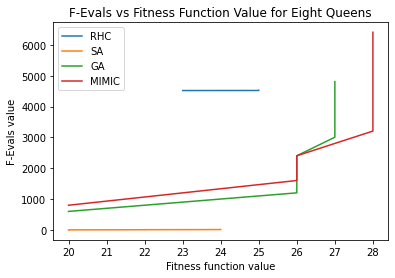

<Figure size 432x288 with 0 Axes>

In [47]:
for y, z in zip(y_s, z_s):
    plt.plot(y['Fitness'], y['FEvals'], label=z)
plt.legend()
plt.title('F-Evals vs Fitness Function Value for {}'.format("Eight Queens"))
plt.xlabel('Fitness function value')
plt.ylabel('F-Evals value')
plt.show()
plt.clf()    

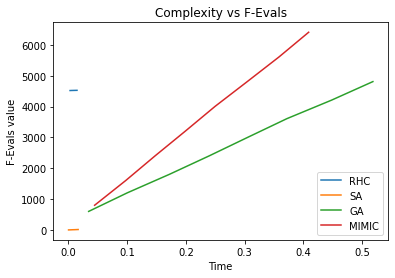

<Figure size 432x288 with 0 Axes>

In [48]:
for y, z in zip(y_s, z_s):
    plt.plot(y['Time'], y['FEvals'], label=z)
plt.legend()
plt.title('Complexity vs F-Evals'.format("Eight Queens"))
plt.xlabel('Time')
plt.ylabel('F-Evals value')
plt.show()
plt.clf()    

In [2]:
!pip show mlrose

Name: mlrose
Version: 1.3.0
Summary: MLROSe: Machine Learning, Randomized Optimization and Search
Home-page: https://github.com/gkhayes/mlrose
Author: Genevieve Hayes
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, sklearn, scipy
Required-by: 


# Travel Salesman Problem - Genetic Algorithm

In [14]:
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_cust = mlrose_hiive.TravellingSales(coords=coords_list)

problem = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_cust, 
                            maximize = False)

init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
x_s = []
y_s = []
z_s = ['RHC', 'SA', 'GA', 'MIMIC']
found_flag = False

iteration_list = init_state

runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list= init_state,
                                       seed=44, max_attempts = 40, 
                                       restart_list = [1, 10, 40, 100, 160])
rhc_run_stats, rhc_run_curves = runner_return.run()

best_index_in_curve = rhc_run_curves.FEvals.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_curve.index = best_curve.Fitness

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [15]:
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=init_state,
                           temperature_list=[1, 10, 50, 100, 110, 160, 250, 500],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay,
                                       mlrose_hiive.ArithDecay],
                           seed=44, max_attempts=110)

sa_run_stats, sa_run_curves = sa.run()  

best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_curve.index = best_curve.Fitness

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [16]:
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list= init_state,
                          max_attempts= 100,
                          population_sizes=[100],
                          mutation_rates=[0.1])
ga_run_stats, ga_run_curves = ga.run() 
best_index_in_curve = ga_run_curves.Fitness.idxmax()
best_decay = ga_run_curves.iloc[best_index_in_curve]['Mutation Rate']
best_curve = ga_run_curves.loc[ga_run_curves['Mutation Rate'] == best_decay, :]
best_curve.reset_index(inplace=True)
x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [17]:
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                  experiment_name="MMC_Exp",
                  seed=44,
                  iteration_list=init_state,
                  max_attempts=100,
                  population_sizes=[200],
                  keep_percent_list=[0.1],
                  use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

best_index_in_curve = mmc_run_stats.Fitness.idxmax()
best_decay = mmc_run_stats.iloc[best_index_in_curve]['Population Size']
best_curve = mmc_run_stats.loc[mmc_run_stats['Population Size'] == best_decay, :]
best_curve.reset_index(inplace=True)

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

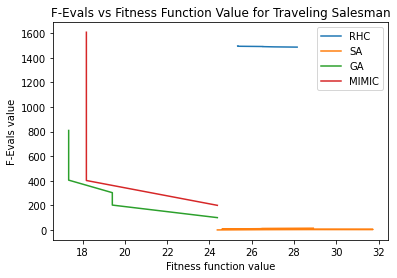

<Figure size 432x288 with 0 Axes>

In [18]:
for y, z in zip(y_s, z_s):
    plt.plot(y['Fitness'], y['FEvals'], label=z)
plt.legend()
plt.title('F-Evals vs Fitness Function Value for {}'.format("Traveling Salesman"))
plt.xlabel('Fitness function value')
plt.ylabel('F-Evals value')
plt.show()
plt.clf()    

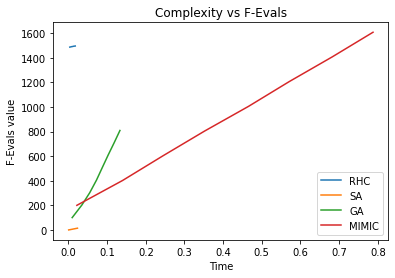

<Figure size 432x288 with 0 Axes>

In [19]:
for y, z in zip(y_s, z_s):
    plt.plot(y['Time'], y['FEvals'], label=z)
plt.legend()
plt.title('Complexity vs F-Evals'.format("Traveling Salesman"))
plt.xlabel('Time')
plt.ylabel('F-Evals value')
plt.show()
plt.clf()    

Random Hill Climbing
best_state
[3 2 1 0 7 6 5 4]
best_fitness
17.34261754766733
avg_fitness
-19.340305747883153
avg_time
0.003137912675197185
max_iter_atts
40
Restarts
0
Simulated Annealing
best_state
[4 3 2 1 0 7 6 5]
best_fitness
17.34261754766733
avg_fitness
-20.463559598571695
avg_time
0.010827900399735054
max_iter_atts
110
Sched
Genetic Algorithm
best_state
[0 7 6 5 4 3 2 1]
best_fitness
17.342617547667327
avg_fitness
-17.573034438790955
avg_time
1.1357489822502338
max_iter_atts
100
prob
0.1
pop_size
100
MIMIC
best_state
[3 4 5 6 0 7 1 2]
best_fitness
18.18033988749895
avg_fitness
-18.197280273681958
avg_time
6.10668605244
max_iter_atts
100
prob
0.1
pop_size
200


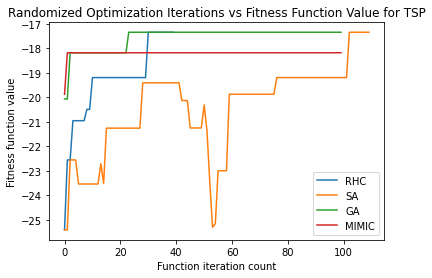

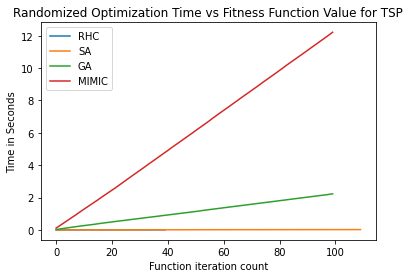

In [18]:
def main():
	name_of_exp = "TSP"

	# Create list of city coordinates
	coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

	# Initialize fitness function object using coords_list
	fitness_coords = mlrose.TravellingSales(coords=coords_list)
	problem = mlrose.TSPOpt(length=8, fitness_fn=fitness_coords,
							maximize=False)

	# Define initial state
	x_s = []
	y_s = []
	z_s = ['RHC', 'SA', 'GA', 'MIMIC']
	w_s = []
	max_val = 19.0
	found_flag = False
	for restarts in np.arange(0, 5):
		if found_flag:
			break
		for max_iter_atts in np.arange(10, 1000, 10):
			if found_flag:
				break
			# Solve problem using simulated annealing
			best_state, best_fitness, learning_curve, timing_curve = mlrose.random_hill_climb(problem, max_attempts=int(max_iter_atts), max_iters=int(max_iter_atts),restarts=int(restarts),curve=True, random_state=1)
			if best_fitness <= max_val:
				x_s.append(np.arange(0, len(learning_curve)))
				y_s.append(learning_curve)
				w_s.append(timing_curve)
				print("Random Hill Climbing")
				print("best_state")     
				print(best_state)
				print("best_fitness")     
				print(best_fitness)
				avg_fitness = learning_curve.mean()    
				print("avg_fitness")     
				print(avg_fitness)
				avg_time = timing_curve.mean()    
				print("avg_time")     
				print(avg_time)    
				print("max_iter_atts")     
				print(max_iter_atts)
				print("Restarts") 
				print(restarts)
				found_flag = True

	found_flag = False
	for sched in [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]:
		if found_flag:
			break
		for max_iter_atts in np.arange(10, 1000, 10):
			if found_flag:
				break
			best_state, best_fitness, learning_curve, timing_curve = mlrose.simulated_annealing(problem,max_attempts=int(max_iter_atts),max_iters=int(max_iter_atts),schedule=sched,curve=True,random_state=1)
			if best_fitness <= max_val:
				x_s.append(np.arange(0, len(learning_curve)))
				y_s.append(learning_curve)
				w_s.append(timing_curve)
				print("Simulated Annealing")
				print("best_state")     
				print(best_state)
				print("best_fitness")     
				print(best_fitness)
				avg_fitness = learning_curve.mean()    
				print("avg_fitness")     
				print(avg_fitness)
				avg_time = timing_curve.mean()    
				print("avg_time")     
				print(avg_time)     
				print("max_iter_atts")     
				print(max_iter_atts)
				print("Sched")   
				print(sched)
				found_flag = True

	found_flag = False
	for prob in np.arange(0.1, 1.1, 0.1):
		if found_flag:
			break
		for pop_size in np.arange(100, 1000, 100):
			if found_flag:
				break
			for max_iter_atts in np.arange(100, 1000, 100):
				if found_flag:
					break
				best_state, best_fitness, learning_curve, timing_curve = mlrose.genetic_alg(problem,pop_size=int(pop_size),mutation_prob=prob,max_attempts=int(max_iter_atts),max_iters=int(max_iter_atts),curve=True,random_state=1)
				if best_fitness <= max_val:
					x_s.append(np.arange(0, len(learning_curve)))
					y_s.append(learning_curve)
					w_s.append(timing_curve)
					print("Genetic Algorithm")
					print("best_state")     
					print(best_state)
					print("best_fitness")     
					print(best_fitness)
					avg_fitness = learning_curve.mean()    
					print("avg_fitness")     
					print(avg_fitness)
					avg_time = timing_curve.mean()    
					print("avg_time")     
					print(avg_time)      
					print("max_iter_atts")     
					print(max_iter_atts)
					print("prob")     
					print(prob)
					print("pop_size")     
					print(pop_size)
					found_flag = True

	found_flag = False
	for prob in np.arange(0.1, 0.5, 0.1):
		if found_flag:
			break
		for pop_size in np.arange(100, 1000, 100):
			if found_flag:
				break
			for max_iter_atts in np.arange(100, 1000, 100):
				if found_flag:
					break
				best_state, best_fitness, learning_curve, timing_curve = mlrose.mimic(problem, pop_size=int(pop_size),
																					  keep_pct=prob,
																					  max_attempts=int(max_iter_atts),
																					  max_iters=int(max_iter_atts),
																					  curve=True,
																					  random_state=1,
																					  fast_mimic=True)
				if best_fitness <= max_val:
					x_s.append(np.arange(0, len(learning_curve)))
					y_s.append(learning_curve)
					w_s.append(timing_curve)
					print("MIMIC")
					print("best_state")     
					print(best_state)
					print("best_fitness")     
					print(best_fitness)
					avg_fitness = learning_curve.mean()    
					print("avg_fitness")     
					print(avg_fitness)
					avg_time = timing_curve.mean()    
					print("avg_time")     
					print(avg_time)      
					print("max_iter_atts")     
					print(max_iter_atts)
					print("prob")     
					print(prob)
					print("pop_size")     
					print(pop_size)
					found_flag = True

	for x, y, z in zip(x_s, y_s, z_s):
		plt.plot(x, y, label=z)
	plt.legend()
	plt.title('Randomized Optimization Iterations vs Fitness Function Value for {}'.format(name_of_exp))
	plt.xlabel('Function iteration count')
	plt.ylabel('Fitness function value')
	plt.show()
	plt.clf()
	for x, w, z in zip(x_s, w_s, z_s):
		plt.plot(x, w, label=z)
	plt.legend()
	plt.title('Randomized Optimization Time vs Fitness Function Value for {}'.format(name_of_exp))
	plt.xlabel('Function iteration count')
	plt.ylabel('Time in Seconds')
	plt.show()


if __name__ == '__main__':
	main()

0.1
26.11701919291919
0.2
26.190809510250602
0.3
28.012663925377296
0.4
27.29162550578379
0.5
28.895116529617816


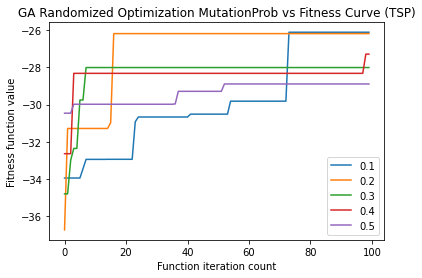

In [2]:
import six
import sys
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
sys.modules['sklearn.externals.six'] = six
import mlrose as mlrose
import numpy as np
import math
import matplotlib.pyplot as plt

def main():
    name_of_exp = "TravellingSales"
    # Create list of city coordinates
    coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3), (7,3),(2,4), (0,0),(0,4)]
    mimic = []
    # Initialize fitness function object using coords_list
    fitness_coords = mlrose.TravellingSales(coords=coords_list)
    problem = mlrose.TSPOpt(length=12, fitness_fn=fitness_coords,
                            maximize=False)
    z_s = ['RHC', 'SA', 'GA', 'MIMIC']
    for i in [0.1,0.2,0.3,0.4,0.5]:
        best_state, best_fitness, learning_curve, timing_curve = mlrose.genetic_alg(problem, pop_size=100,
                                                                              mutation_prob=i,
                                                                              max_attempts=100,
                                                                              max_iters=100, curve=True,
                                                                              random_state=1)
        mimic.append(learning_curve)
        print(i)
        print(best_fitness)
    for x, z in zip([0.1,0.2,0.3,0.4,0.5], mimic):
        plt.plot(z, label=str(x))
    plt.legend()
    plt.title('GA Randomized Optimization MutationProb vs Fitness Curve (TSP)')
    plt.xlabel('Function iteration count')
    plt.ylabel('Fitness function value')
    plt.show()

if __name__ == '__main__':
    main()

# 8 Queens Problem - Simulated Annealing

Random Hill Climbing
best_state
[5 2 6 1 7 4 0 3]
best_fitness
28.0
avg_fitness
25.215625
avg_time
0.010604060724506325
max_iter_atts
160
Restarts
1
Simulated Annealing
best_state
[4 2 7 3 6 0 5 1]
best_fitness
28.0
avg_fitness
24.39375
avg_time
0.012857015067982046
max_iter_atts
160
Sched
Genetic Algorithm
best_state
[5 2 6 3 0 7 1 4]
best_fitness
28.0
avg_fitness
26.981666666666666
avg_time
3.6853691058340154
max_iter_atts
600
prob
0.1
pop_size
100
MIMIC
best_state
[3 0 4 7 1 6 2 5]
best_fitness
28.0
avg_fitness
27.95
avg_time
2.593094470610522
max_iter_atts
100
prob
0.1
pop_size
800


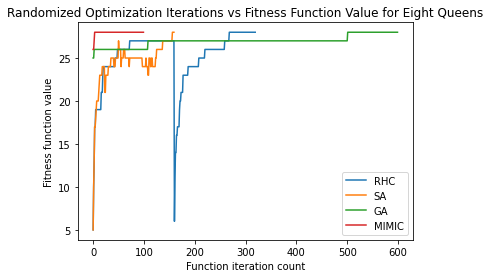

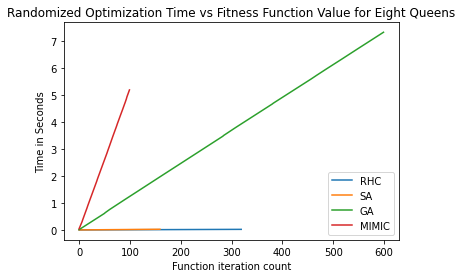

In [20]:
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
	# Initialize counter
	fitness = 0

	# For all pairs of queens
	for i in range(len(state) - 1):
		for j in range(i + 1, len(state)):

			# Check for horizontal, diagonal-up and diagonal-down attacks
			if (state[j] != state[i]) \
					and (state[j] != state[i] + (j - i)) \
					and (state[j] != state[i] - (j - i)):
				# If no attacks, then increment counter
				fitness += 1

	return fitness


def main():
	name_of_exp = "Eight Queens"
	fitness = mlrose.CustomFitness(queens_max)
	problem = mlrose.DiscreteOpt(length=8, fitness_fn=fitness, maximize=True, max_val=8)

	# Define initial state
	init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
	x_s = []
	y_s = []
	z_s = ['RHC', 'SA', 'GA', 'MIMIC']
	w_s = []
	max_val = 28.0
	found_flag = False
	for restarts in np.arange(0, 5):
		if found_flag:
			break
		for max_iter_atts in np.arange(10, 1000, 10):
			if found_flag:
				break
			# Solve problem using Random Hill Climbing
			best_state, best_fitness, learning_curve, timing_curve = mlrose.random_hill_climb(problem, max_attempts=int(
				max_iter_atts), max_iters=int(max_iter_atts),
																							  restarts=int(restarts),
																							  init_state=init_state,
																							  curve=True,
																							  random_state=1)
			if best_fitness == max_val:
				x_s.append(np.arange(0, len(learning_curve)))
				y_s.append(learning_curve)
				w_s.append(timing_curve)
				print("Random Hill Climbing")
				print("best_state")     
				print(best_state)
				print("best_fitness")     
				print(best_fitness)
				avg_fitness = learning_curve.mean()    
				print("avg_fitness")     
				print(avg_fitness)
				avg_time = timing_curve.mean()    
				print("avg_time")     
				print(avg_time)    
				print("max_iter_atts")     
				print(max_iter_atts)
				print("Restarts") 
				print(restarts)
				found_flag = True

	found_flag = False
	for sched in [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]:
		if found_flag:
			break
		for max_iter_atts in np.arange(10, 1000, 10):
			if found_flag:
				break
			best_state, best_fitness, learning_curve, timing_curve = mlrose.simulated_annealing(problem,
																								max_attempts=int(max_iter_atts),
																								max_iters=int(max_iter_atts),
																								schedule=sched,
																								init_state=init_state,
																								curve=True,
																								random_state=1)
			if best_fitness == max_val:
				x_s.append(np.arange(0, len(learning_curve)))
				y_s.append(learning_curve)
				w_s.append(timing_curve)
				print("Simulated Annealing")
				print("best_state")     
				print(best_state)
				print("best_fitness")     
				print(best_fitness)
				avg_fitness = learning_curve.mean()    
				print("avg_fitness")     
				print(avg_fitness)
				avg_time = timing_curve.mean()    
				print("avg_time")     
				print(avg_time)     
				print("max_iter_atts")     
				print(max_iter_atts)
				print("Sched")   
				print(sched)
				found_flag = True

	found_flag = False
	for prob in np.arange(0.1, 1.1, 0.1):
		if found_flag:
			break
		for pop_size in np.arange(100, 1000, 100):
			if found_flag:
				break
			for max_iter_atts in np.arange(100, 1000, 100):
				if found_flag:
					break
				best_state, best_fitness, learning_curve, timing_curve = mlrose.genetic_alg(problem, pop_size=int(pop_size),
																							mutation_prob=prob,
																							max_attempts=int(max_iter_atts),
																							max_iters=int(max_iter_atts),
																							curve=True,
																							random_state=1)
				if best_fitness == max_val:
					x_s.append(np.arange(0, len(learning_curve)))
					y_s.append(learning_curve)
					w_s.append(timing_curve)
					print("Genetic Algorithm")
					print("best_state")     
					print(best_state)
					print("best_fitness")     
					print(best_fitness)
					avg_fitness = learning_curve.mean()    
					print("avg_fitness")     
					print(avg_fitness)
					avg_time = timing_curve.mean()    
					print("avg_time")     
					print(avg_time)      
					print("max_iter_atts")     
					print(max_iter_atts)
					print("prob")     
					print(prob)
					print("pop_size")     
					print(pop_size)
					found_flag = True

	found_flag = False
	for prob in np.arange(0.1, 0.5, 0.1):
		if found_flag:
			break
		for pop_size in np.arange(100, 1000, 100):
			if found_flag:
				break
			for max_iter_atts in np.arange(100, 1000, 100):
				if found_flag:
					break
				best_state, best_fitness, learning_curve, timing_curve = mlrose.mimic(problem, pop_size=int(pop_size),
																					  keep_pct=prob,
																					  max_attempts=int(max_iter_atts),
																					  max_iters=int(max_iter_atts), curve=True,
																					  random_state=1,
																					  fast_mimic=True)
				if best_fitness == max_val:
					x_s.append(np.arange(0, len(learning_curve)))
					y_s.append(learning_curve)
					w_s.append(timing_curve)
					print("MIMIC")
					print("best_state")     
					print(best_state)
					print("best_fitness")     
					print(best_fitness)
					avg_fitness = learning_curve.mean()    
					print("avg_fitness")     
					print(avg_fitness)
					avg_time = timing_curve.mean()    
					print("avg_time")     
					print(avg_time)      
					print("max_iter_atts")     
					print(max_iter_atts)
					print("prob")     
					print(prob)
					print("pop_size")     
					print(pop_size)
					found_flag = True


	for x, y, z in zip(x_s, y_s, z_s):
		plt.plot(x, y, label=z)
	plt.legend()
	plt.title('Randomized Optimization Iterations vs Fitness Function Value for {}'.format(name_of_exp))
	plt.xlabel('Function iteration count')
	plt.ylabel('Fitness function value')
	plt.show()
	plt.clf()
	for x, w, z in zip(x_s, w_s, z_s):
		plt.plot(x, w, label=z)
	plt.legend()
	plt.title('Randomized Optimization Time vs Fitness Function Value for {}'.format(name_of_exp))
	plt.xlabel('Function iteration count')
	plt.ylabel('Time in Seconds')
	plt.show()


if __name__ == '__main__':
	main()

28.0
27.0
22.0


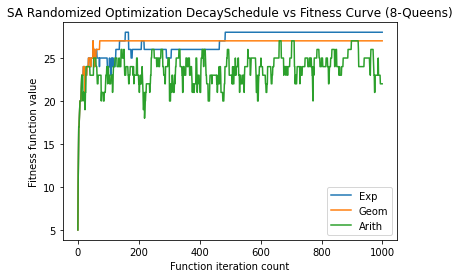

In [21]:
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    # Initialize counter
    fitness = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                    and (state[j] != state[i] + (j - i)) \
                    and (state[j] != state[i] - (j - i)):
                # If no attacks, then increment counter
                fitness += 1

    return fitness

def main():
    name_of_exp = "Eight Queens"
    fitness = mlrose.CustomFitness(queens_max)
    problem = mlrose.DiscreteOpt(length=8, fitness_fn=fitness, maximize=True, max_val=8)

    # Define initial state
    mimic = []
    init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
    for i in [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]:
        best_state, best_fitness, learning_curve, timing_curve = mlrose.simulated_annealing(problem, init_state=init_state,
                                                                              schedule=i,
                                                                              max_attempts=1000,
                                                                              max_iters=1000, curve=True,
                                                                              random_state=1)
        mimic.append(learning_curve)
        print(i)
        print(best_fitness)
    for x, z in zip(['Exp','Geom','Arith'], mimic):
        plt.plot(z, label=str(x))
    plt.legend()
    plt.title('SA Randomized Optimization DecaySchedule vs Fitness Curve (8-Queens)')
    plt.xlabel('Function iteration count')
    plt.ylabel('Fitness function value')
    plt.show()

if __name__ == '__main__':
    main()

# One Max - MIMIC

In [17]:
# Initialize fitness function object using coords_list
fitness_cust = mlrose_hiive.OneMax()

problem = mlrose_hiive.DiscreteOpt(length=10, fitness_fn=fitness_cust, maximize=True, max_val=2)

init_state = np.ones(10)
x_s = []
y_s = []
z_s = ['RHC', 'SA', 'GA', 'MIMIC']
found_flag = False

iteration_list = init_state

runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list= init_state,
                                       seed=44, max_attempts = 40, 
                                       restart_list = [1, 10, 40, 100, 160])
rhc_run_stats, rhc_run_curves = runner_return.run()

best_index_in_curve = rhc_run_curves.FEvals.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_curve.index = best_curve.Fitness

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [18]:
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=init_state,
                           temperature_list=[1, 10, 50, 100, 110, 160, 180, 500],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay,
                                       mlrose_hiive.ArithDecay],
                           seed=44, max_attempts=180)

sa_run_stats, sa_run_curves = sa.run()  

best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_curve.index = best_curve.Fitness

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [19]:
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list= init_state,
                          max_attempts= 10,
                          population_sizes=[100],
                          mutation_rates=[0.1])
ga_run_stats, ga_run_curves = ga.run() 
best_index_in_curve = ga_run_curves.Fitness.idxmax()
best_decay = ga_run_curves.iloc[best_index_in_curve]['Mutation Rate']
best_curve = ga_run_curves.loc[ga_run_curves['Mutation Rate'] == best_decay, :]
best_curve.reset_index(inplace=True)
x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [20]:
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                  experiment_name="MMC_Exp",
                  seed=44,
                  iteration_list=init_state,
                  max_attempts=10,
                  population_sizes=[300],
                  keep_percent_list=[0.1],
                  use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

best_index_in_curve = mmc_run_stats.Fitness.idxmax()
best_decay = mmc_run_stats.iloc[best_index_in_curve]['Population Size']
best_curve = mmc_run_stats.loc[mmc_run_stats['Population Size'] == best_decay, :]
best_curve.reset_index(inplace=True)

x_s.append(np.arange(0, len(best_curve)))
y_s.append(best_curve)

In [21]:
y_s

[         index  Iteration     Time  ...  Restarts  max_iters  current_restart
 Fitness                             ...                                      
 7.0        320          1  0.00313  ...       160          1              160
 
 [1 rows x 8 columns],
          index  Iteration      Time  Fitness  FEvals Temperature  max_iters
 Fitness                                                                    
 7.0          0          0  0.000244      7.0     0.0           1          1
 7.0          1          1  0.004297      7.0     1.0           1          1,
    index  Iteration      Time  ...  Population Size  Mutation Rate  max_iters
 0      0          0  0.002811  ...              100            0.1          1
 1      1          1  0.015206  ...              100            0.1          1
 
 [2 rows x 8 columns],
     index  Iteration  Fitness  ...  Population Size  Keep Percent max_iters
 0       0        0.0      7.0  ...              300           0.1         1
 1       1   

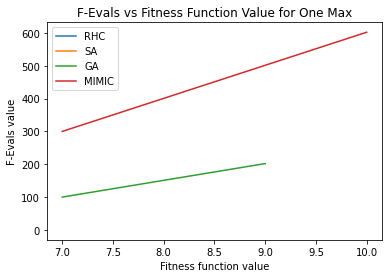

<Figure size 432x288 with 0 Axes>

In [24]:
for y, z in zip(y_s, z_s):
    plt.plot(y['Fitness'], y['FEvals'], label=z)
plt.legend()
plt.title('F-Evals vs Fitness Function Value for {}'.format("One Max"))
plt.xlabel('Fitness function value')
plt.ylabel('F-Evals value')
plt.show()
plt.clf()    

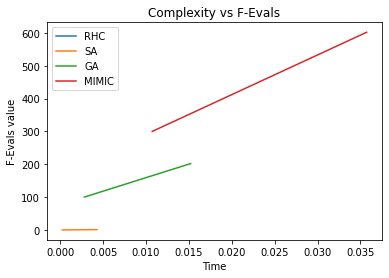

<Figure size 432x288 with 0 Axes>

In [25]:
for y, z in zip(y_s, z_s):
    plt.plot(y['Time'], y['FEvals'], label=z)
plt.legend()
plt.title('Complexity vs F-Evals'.format("One Max"))
plt.xlabel('Time')
plt.ylabel('F-Evals value')
plt.show()
plt.clf()    

Random Hill Climbing
best_state
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
best_fitness
10.0
avg_fitness
7.925
avg_time
0.00046458450042337064
max_iter_atts
40
Restarts
0
Simulated Annealing
best_state
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
best_fitness
10.0
avg_fitness
7.972222222222222
avg_time
0.006026645911050663
max_iter_atts
180
Sched
Genetic Algorithm
best_state
[1 1 1 1 1 1 1 1 1 1]
best_fitness
10.0
avg_fitness
9.7
avg_time
0.07119177599979594
max_iter_atts
10
prob
0.1
pop_size
100
MIMIC
best_state
[1 1 1 1 1 1 1 1 1 1]
best_fitness
10.0
avg_fitness
10.0
avg_time
0.04081227420065261
max_iter_atts
10
prob
0.1
pop_size
300


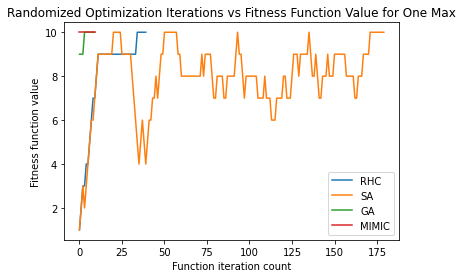

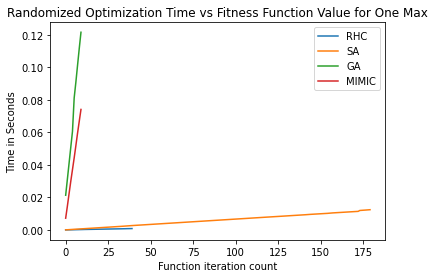

In [5]:
def main():
	name_of_exp = "One Max"
	fitness = mlrose.OneMax()
	problem = mlrose.DiscreteOpt(length=10, fitness_fn=fitness, maximize=True, max_val=2)

	# Define initial state
	init_state = np.zeros(10)
	x_s = []
	y_s = []
	z_s = ['RHC', 'SA', 'GA', 'MIMIC']
	w_s = []
	max_val = 10.0
	found_flag = False
	for restarts in np.arange(0, 5):
		if found_flag:
			break
		for max_iter_atts in np.arange(10, 1000, 10):
			if found_flag:
				break
			# Solve problem using simulated annealing
			best_state, best_fitness, learning_curve, timing_curve = mlrose.random_hill_climb(problem, max_attempts=int(
				max_iter_atts), max_iters=int(max_iter_atts),
																							  restarts=int(restarts),
																							  init_state=init_state,
																							  curve=True,
																							  random_state=1)
			if best_fitness == max_val:
				x_s.append(np.arange(0, len(learning_curve)))
				y_s.append(learning_curve)
				w_s.append(timing_curve)
				print("Random Hill Climbing")
				print("best_state")     
				print(best_state)
				print("best_fitness")     
				print(best_fitness)
				avg_fitness = learning_curve.mean()    
				print("avg_fitness")     
				print(avg_fitness)
				avg_time = timing_curve.mean()    
				print("avg_time")     
				print(avg_time)    
				print("max_iter_atts")     
				print(max_iter_atts)
				print("Restarts") 
				print(restarts)
				found_flag = True

	found_flag = False
	for sched in [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]:
		if found_flag:
			break
		for max_iter_atts in np.arange(10, 1000, 10):
			if found_flag:
				break
			best_state, best_fitness, learning_curve, timing_curve = mlrose.simulated_annealing(problem,
																								max_attempts=int(max_iter_atts),
																								max_iters=int(max_iter_atts),
																								schedule=sched,
																								init_state=init_state,
																								curve=True,
																								random_state=1)
			if best_fitness == max_val:
				x_s.append(np.arange(0, len(learning_curve)))
				y_s.append(learning_curve)
				w_s.append(timing_curve)
				print("Simulated Annealing")
				print("best_state")     
				print(best_state)
				print("best_fitness")     
				print(best_fitness)
				avg_fitness = learning_curve.mean()    
				print("avg_fitness")     
				print(avg_fitness)
				avg_time = timing_curve.mean()    
				print("avg_time")     
				print(avg_time)     
				print("max_iter_atts")     
				print(max_iter_atts)
				print("Sched")   
				print(sched)
				found_flag = True

	found_flag = False
	for prob in np.arange(0.1, 1.1, 0.1):
		if found_flag:
			break
		for pop_size in np.arange(100, 5000, 100):
			if found_flag:
				break
			for max_iter_atts in np.arange(10, 1000, 10):
				if found_flag:
					break
				best_state, best_fitness, learning_curve, timing_curve = mlrose.genetic_alg(problem, pop_size=int(pop_size),
																							mutation_prob=prob,
																							max_attempts=int(max_iter_atts),
																							max_iters=int(max_iter_atts),
																							curve=True,
																							random_state=1)
				if best_fitness == max_val:
					x_s.append(np.arange(0, len(learning_curve)))
					y_s.append(learning_curve)
					w_s.append(timing_curve)
					print("Genetic Algorithm")
					print("best_state")     
					print(best_state)
					print("best_fitness")     
					print(best_fitness)
					avg_fitness = learning_curve.mean()    
					print("avg_fitness")     
					print(avg_fitness)
					avg_time = timing_curve.mean()    
					print("avg_time")     
					print(avg_time)      
					print("max_iter_atts")     
					print(max_iter_atts)
					print("prob")     
					print(prob)
					print("pop_size")     
					print(pop_size)
					found_flag = True

	found_flag = False
	for prob in np.arange(0.1, 1.1, 0.1):
		if found_flag:
			break
		for pop_size in np.arange(100, 5000, 100):
			if found_flag:
				break
			for max_iter_atts in np.arange(10, 1000, 10):
				if found_flag:
					break
				best_state, best_fitness, learning_curve, timing_curve = mlrose.mimic(problem, pop_size=int(pop_size),
																					  keep_pct=prob,
																					  max_attempts=int(max_iter_atts),
																					  max_iters=int(max_iter_atts), curve=True,
																					  random_state=1,
																					  fast_mimic=True)
				if best_fitness == max_val:
					x_s.append(np.arange(0, len(learning_curve)))
					y_s.append(learning_curve)
					w_s.append(timing_curve)
					print("MIMIC")
					print("best_state")     
					print(best_state)
					print("best_fitness")     
					print(best_fitness)
					avg_fitness = learning_curve.mean()    
					print("avg_fitness")     
					print(avg_fitness)
					avg_time = timing_curve.mean()    
					print("avg_time")     
					print(avg_time)      
					print("max_iter_atts")     
					print(max_iter_atts)
					print("prob")     
					print(prob)
					print("pop_size")     
					print(pop_size)
					found_flag = True


	for x, y, z in zip(x_s, y_s, z_s):
		plt.plot(x, y, label=z)
	plt.legend()
	plt.title('Randomized Optimization Iterations vs Fitness Function Value for {}'.format(name_of_exp))
	plt.xlabel('Function iteration count')
	plt.ylabel('Fitness function value')
	plt.show()
	plt.clf()
	for x, w, z in zip(x_s, w_s, z_s):
		plt.plot(x, w, label=z)
	plt.legend()
	plt.title('Randomized Optimization Time vs Fitness Function Value for {}'.format(name_of_exp))
	plt.xlabel('Function iteration count')
	plt.ylabel('Time in Seconds')
	plt.show()


if __name__ == '__main__':
	main()

MIMC
100
15.0
10
MIMC
200
15.0
10
MIMC
300
15.0
10
MIMC
400
15.0
10
MIMC
500
15.0
10


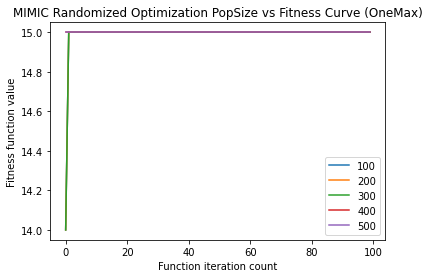

In [25]:
def main():
	name_of_exp = "One Max"
	fitness = mlrose.OneMax()
	mimic = []
	z_s = ['RHC', 'SA', 'GA', 'MIMIC']
	for i in [100, 200, 300, 400, 500]:
		problem = mlrose.DiscreteOpt(length=15, fitness_fn=fitness, maximize=True, max_val=2)
		print("MIMC")
		max_atts = 10
		best_state, best_fitness, learning_curve, timing_curve = mlrose.mimic(problem, pop_size=i,
																			  keep_pct=0.1,
																			  max_attempts=100,
																			  max_iters=100, curve=True,
																			  random_state=1,
																			  fast_mimic=True)
		mimic.append(learning_curve)
		print(i)
		print(best_fitness)
		print(max_atts)
	for x, z in zip([100,200,300,400,500], mimic):
		plt.plot(z, label=str(x))
	plt.legend()
	plt.title('MIMIC Randomized Optimization PopSize vs Fitness Curve (OneMax)')
	plt.xlabel('Function iteration count')
	plt.ylabel('Fitness function value')
	plt.show()

if __name__ == '__main__':
	main()

RHC
5
5.0
30
SA
5
5.0
60
GA
5
5.0
20
MIMC
5
5.0
20
RHC
10
10.0
40
SA
10
10.0
190
GA
10
10.0
20
MIMC
10
10.0
20
RHC
15
15.0
50
SA
15
15.0
220
GA
15
15.0
30
MIMC
15
15.0
20


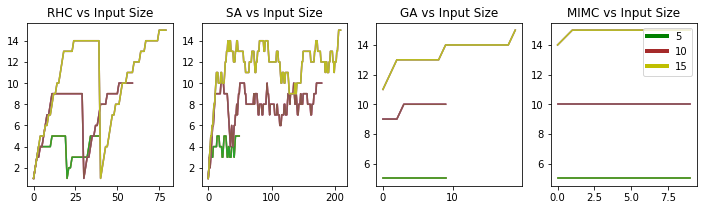

In [26]:
def main():
	name_of_exp = "One Max"
	fitness = mlrose.OneMax()
	rhc = []
	sa = []
	ga = []
	mimic = []
	z_s = ['RHC', 'SA', 'GA', 'MIMIC']
	for i in [5, 10, 15]:
		problem = mlrose.DiscreteOpt(length=i, fitness_fn=fitness, maximize=True, max_val=2)
		# Define initial state
		init_state = np.zeros(i)

		# Solve problem using simulated annealing
		best_fitness = 0
		learning_curve = []
		max_atts = 10
		print("RHC")
		while best_fitness != i:
			best_state, best_fitness, learning_curve, timing_curve = mlrose.random_hill_climb(problem,
																							  max_attempts=max_atts,
																							  max_iters=max_atts,
																							  restarts=1,
																							  init_state=init_state,
																							  curve=True,
																							  random_state=1)
			max_atts += 10

		rhc.append(learning_curve)
		print(i)
		print(best_fitness)
		print(max_atts)
		print("SA")
		best_fitness = 0
		learning_curve = []
		max_atts = 10
		while best_fitness != i:
			best_state, best_fitness, learning_curve, timing_curve = mlrose.simulated_annealing(problem,
																								max_attempts=max_atts,
																								max_iters=max_atts,
																								schedule=mlrose.ExpDecay(),
																								init_state=init_state,
																								curve=True,
																								random_state=1)
			max_atts += 10

		sa.append(learning_curve)
		print(i)
		print(best_fitness)
		print(max_atts)
		print("GA")
		best_fitness = 0
		learning_curve = []
		max_atts = 10
		while best_fitness != i:
			best_state, best_fitness, learning_curve, timing_curve = mlrose.genetic_alg(problem, pop_size=100,
																						mutation_prob=0.1,
																						max_attempts=max_atts,
																						max_iters=max_atts,
																						curve=True,
																						random_state=1)
			max_atts += 10
		ga.append(learning_curve)
		print(i)
		print(best_fitness)
		print(max_atts)
		print("MIMC")
		best_fitness = 0
		learning_curve = []
		max_atts = 10
		while best_fitness != i:
			best_state, best_fitness, learning_curve, timing_curve = mlrose.mimic(problem, pop_size=300,
																				  keep_pct=0.1,
																				  max_attempts=max_atts,
																				  max_iters=max_atts, curve=True,
																				  random_state=1,
																				  fast_mimic=True)
			max_atts += 10
		mimic.append(learning_curve)
		print(i)
		print(best_fitness)
		print(max_atts)
	f, axarr = plt.subplots(1, 4)
	f.set_figheight(3)
	f.set_figwidth(12)
	for y in rhc:
		for i in ['5','10','15']:
				axarr[0].plot(y, label='{}'.format(i))
	axarr[0].set_title('RHC vs Input Size')
	for y in sa:
		for i in ['5', '10', '15']:
			axarr[1].plot(y, label='{}'.format(i))
	axarr[1].set_title('SA vs Input Size')
	for y in ga:
		for i in ['5', '10', '15']:
			axarr[2].plot(y, label='{}'.format(i))
	axarr[2].set_title('GA vs Input Size')
	for y in mimic:
		for i in ['5', '10', '15']:
			axarr[3].plot(y, label='{}'.format(i))
	axarr[3].set_title('MIMC vs Input Size')
	# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
	#plt.setp([a.get_xticklabels() for a in axarr[0]], visible=False)
	#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
	plt.legend(handles=[Line2D([0], [0], color='g', lw=4, label='5'),
				   Line2D([0], [0], color='brown', lw=4, label='10'),
				   Line2D([0], [0], color='y', lw=4, label='15')])
	#plt.title('Input size vs fitness curve One Max')
   # plt.xlabel('Function iteration count')
	#plt.ylabel('Fitness function value')

	plt.show()

if __name__ == '__main__':
	main()

# NN

Random Hill Climbing
begin training
Training accuracy:  0.5552654482158399
Test accuracy:  0.5652245980440909
Loss function value 3.785398095466278
begin training
Training accuracy:  0.6603257490985951
Test accuracy:  0.6542350406099785
Loss function value 1.1150651983686402
begin training
Training accuracy:  0.7473579510133035
Test accuracy:  0.7473893585280955
Loss function value 0.5871392892560306
begin training
Training accuracy:  0.5508723942144308
Test accuracy:  0.550306646776065
Loss function value 0.7538478617857051
[array([[  3.78544254,   2.        ],
       [  3.78544254,   3.        ],
       [  3.78544236,   5.        ],
       [  3.78544226,   7.        ],
       [  3.7854422 ,   9.        ],
       [  3.78544201,  11.        ],
       [  3.78544163,  13.        ],
       [  3.78544078,  15.        ],
       [  3.785435  ,  17.        ],
       [  3.78543205,  19.        ],
       [  3.78543202,  21.        ],
       [  3.78543181,  23.        ],
       [  3.78543181,  2

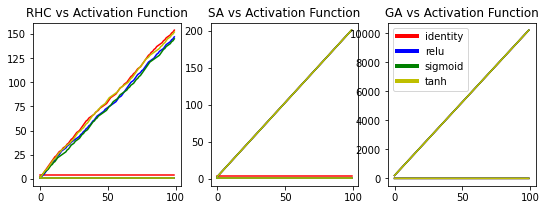

In [8]:
import sys

import six

sys.modules['sklearn.externals.six'] = six
import mlrose_hiive as mlrose
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


def run_something(values, restarts=0, schedule=mlrose.GeomDecay(), mutation_prob=0.1, pop_size=200):
    curves = []
    for x in ['identity', 'relu', 'sigmoid', 'tanh']:
        # Normalize feature data
        if values['algo'] == 'rhc':
            nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation=x,
                                             algorithm='random_hill_climb', max_iters=100,
                                             bias=True, is_classifier=True, learning_rate=0.00001,
                                             early_stopping=True, max_attempts=100,
                                             random_state=1, restarts=restarts, curve=True, clip_max=1)
        if values['algo'] == 'sa':
            nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation=x,
                                             algorithm='simulated_annealing', max_iters=100,
                                             bias=True, is_classifier=True, learning_rate=0.00001,
                                             early_stopping=True, max_attempts=100,
                                             random_state=1, schedule=schedule, curve=True, clip_max=1)
        if values['algo'] == 'ga':
            nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[10, 10], activation=x,
                                             algorithm='genetic_alg', max_iters=100,
                                             bias=True, is_classifier=True, learning_rate=0.00001,
                                             early_stopping=True, max_attempts=100,
                                             random_state=1, pop_size=pop_size, mutation_prob=mutation_prob, curve=True,
                                             clip_max=1)
        print('begin training')
        nn_model1.fit(values["X_train"], values["y_train"])
        # Predict labels for train set and assess accuracy
        y_train_pred = nn_model1.predict(values["X_train"])

        y_train_accuracy = accuracy_score(values["y_train"], y_train_pred)

        print('Training accuracy: ', y_train_accuracy)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model1.predict(values["X_test"])

        y_test_accuracy = accuracy_score(values["y_test"], y_test_pred)

        print('Test accuracy: ', y_test_accuracy)

        print('Loss function value', nn_model1.loss)
        curves.append(nn_model1.fitness_curve)
    return curves


def main():
    ds1 = pd.read_csv('adult.data',
                      names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                             'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                             'native-country', '<=50k'])
    ds1.dropna()
    ds1.drop_duplicates()
    ds1 = ds1[ds1['workclass'] != '?']
    ds1 = ds1[ds1['occupation'] != '?']
    ds1 = ds1[ds1['education'] != '?']
    ds1 = ds1[ds1['marital-status'] != '?']
    ds1 = ds1[ds1['relationship'] != '?']
    ds1 = ds1[ds1['race'] != '?']
    ds1 = ds1[ds1['sex'] != '?']
    ds1 = ds1[ds1['native-country'] != '?']
    ds1_dummies = pd.get_dummies(ds1, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                                               'race', 'sex', 'native-country'])
    ds1_dummies.dropna()
    ds1_dummies['<=50k'].value_counts()
    ds1_dummies['<=50k'] = ds1_dummies['<=50k'].map({'<=50K': 1, '>50K': 0})
    ds1_labels = ds1_dummies['<=50k']
    ds1_dummies = ds1_dummies.drop(['<=50k'], axis=1)
    # ds2 = pd.read_csv('../assignment1/data/bank-additional-full.csv', delimiter=';')
    # ds2.dropna()
    # ds2.drop_duplicates()
    # ds2_dummies = pd.get_dummies(ds2, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    #                                            'month', 'day_of_week', 'poutcome'])
    # ds2_dummies.dropna()
    # ds2_dummies['y'].value_counts()
    # ds2_dummies['y'] = ds2_dummies['y'].map({'yes': 1, 'no': 0})
    # ds2_labels = ds2_dummies['y']
    # ds2_dummies = ds2_dummies.drop(['y'], axis=1)
    scaler = StandardScaler()

    scaled_ds1_dummies = scaler.fit_transform(ds1_dummies, y=ds1_labels)

    X_train, X_test, y_train, y_test = train_test_split(scaled_ds1_dummies, ds1_labels, test_size=0.20,
                                                        stratify=ds1_labels)

    v = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}

    print("Random Hill Climbing")
    v['algo'] = 'rhc'
    rhc = run_something(v, 0)
    print(rhc)
    print("SA")

    v['algo'] = 'sa'
    sa = run_something(v, 0, mlrose.ExpDecay(), 0.1)
    print(sa)
    print("GA")

    v['algo'] = 'ga'
    ga = run_something(v, 0, mlrose.ExpDecay(), 0.1, 100)

    f, axarr = plt.subplots(1, 3)
    f.set_figheight(3)
    f.set_figwidth(9)
    for y, i  in zip(rhc, ['r', 'b', 'g', 'y']):
        axarr[0].plot(y, color=i)
    axarr[0].set_title('RHC vs Activation Function')
    for y, i  in zip(sa, ['r', 'b', 'g', 'y']):
        axarr[1].plot(y, color=i)
    axarr[1].set_title('SA vs Activation Function')
    for y, i  in zip(ga, ['r', 'b', 'g', 'y']):
        axarr[2].plot(y, color=i)
    axarr[2].set_title('GA vs Activation Function')
    # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
    # plt.setp([a.get_xticklabels() for a in axarr[0]], visible=False)
    # plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
    plt.legend(handles=[Line2D([0], [0], color='r', lw=4, label='identity'),
                        Line2D([0], [0], color='b', lw=4, label='relu'),
                        Line2D([0], [0], color='g', lw=4, label='sigmoid'),
                        Line2D([0], [0], color='y', lw=4, label='tanh')])
    # plt.title('Input size vs fitness curve One Max')
    # plt.xlabel('Function iteration count')
    # plt.ylabel('Fitness function value')

    plt.show()


if __name__ == '__main__':
    main()